In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import thinkstats2
import thinkplot
from sklearn.feature_selection import VarianceThreshold
plt.style.use('fivethirtyeight')
from scipy import stats

In [3]:
train = pd.read_csv('G:/Desktop/datasets/flight-delays-spring-2018/flight_delays_train.csv')
test = pd.read_csv('G:/Desktop/datasets/flight-delays-spring-2018/flight_delays_test.csv')

In [4]:
data = train.copy()

### preprocessing

In [5]:
d = {'N':0, 'Y':1}
data['dep_delayed_15min'] = data['dep_delayed_15min'].map(d)

In [6]:
d = {'c-7':7, 'c-3':3, 'c-5':5, 'c-6':6, 'c-4':4, 'c-2':2, 'c-1':1}
data['DayOfWeek'] = data['DayOfWeek'].map(d)

In [7]:
d = {'c-8':8, 'c-4':4, 'c-9':9, 'c-11':11, 'c-10':10, 'c-1':1, 'c-7':7, 'c-6':6, 'c-5':5,
       'c-3':3, 'c-12':12, 'c-2':2}
data['Month'] = data['Month'].map(d)

In [8]:
d = {'c-21':21, 'c-20':20, 'c-2':2, 'c-25':25, 'c-7':7, 'c-3':3, 'c-27':27, 'c-29':29,
       'c-28':28, 'c-5':5, 'c-6':6, 'c-10':10, 'c-19':19, 'c-26':26, 'c-14':14, 'c-22':22,
       'c-9':9, 'c-31':31, 'c-4':4, 'c-16':16, 'c-18':18, 'c-30':30, 'c-1':1, 'c-24':24,
       'c-15':15, 'c-17':17, 'c-8':8, 'c-12':12, 'c-13':13, 'c-11':11, 'c-23':23}
data['DayofMonth'] = data['DayofMonth'].map(d)

In [9]:
data['Distance'] = np.log(data['Distance'])

In [10]:
data.loc[(data['DepTime'] > 2361)&(data['DepTime'] < 2461),'DepTime'] = 59
data.loc[(data['DepTime'] > 2461)&(data['DepTime'] < 2561),'DepTime'] = 159

In [11]:
data['depTime']=0
data.loc[data['DepTime']<=61,'depTime']=1
data.loc[(data['DepTime']>61)&(data['DepTime']<=161),'depTime']=2
data.loc[(data['DepTime']>161)&(data['DepTime']<261),'depTime']=3
data.loc[(data['DepTime']>261)&(data['DepTime']<=361),'depTime']=4
data.loc[(data['DepTime']>361)&(data['DepTime']<=461),'depTime']=5
data.loc[(data['DepTime']>461)&(data['DepTime']<=561),'depTime']=6
data.loc[(data['DepTime']>561)&(data['DepTime']<=661),'depTime']=7
data.loc[(data['DepTime']>661)&(data['DepTime']<=761),'depTime']=8
data.loc[(data['DepTime']>761)&(data['DepTime']<=861),'depTime']=9
data.loc[(data['DepTime']>861)&(data['DepTime']<=961),'depTime']=10
data.loc[(data['DepTime']>961)&(data['DepTime']<=1061),'depTime']=11
data.loc[(data['DepTime']>1061)&(data['DepTime']<=1161),'depTime']=12
data.loc[(data['DepTime']>1161)&(data['DepTime']<=1261),'depTime']=13
data.loc[(data['DepTime']>1261)&(data['DepTime']<=1361),'depTime']=14
data.loc[(data['DepTime']>1361)&(data['DepTime']<=1461),'depTime']=15
data.loc[(data['DepTime']>1461)&(data['DepTime']<=1561),'depTime']=16
data.loc[(data['DepTime']>1561)&(data['DepTime']<=1661),'depTime']=17
data.loc[(data['DepTime']>1661)&(data['DepTime']<=1761),'depTime']=18
data.loc[(data['DepTime']>1761)&(data['DepTime']<=1861),'depTime']=19
data.loc[(data['DepTime']>1861)&(data['DepTime']<=1961),'depTime']=20
data.loc[(data['DepTime']>1961)&(data['DepTime']<=2061),'depTime']=21
data.loc[(data['DepTime']>2061)&(data['DepTime']<=2161),'depTime']=22
data.loc[(data['DepTime']>2161)&(data['DepTime']<=2261),'depTime']=23
data.loc[(data['DepTime']>2261)&(data['DepTime']<=2361),'depTime']=24

In [12]:
data.drop('DepTime', axis=1, inplace=True)

In [79]:
data.dtypes

Month                  int64
DayofMonth             int64
DayOfWeek              int64
UniqueCarrier         object
Origin                object
Dest                  object
Distance             float64
dep_delayed_15min      int64
depTime                int64
dtype: object

### pairplot for all features

<Figure size 864x720 with 0 Axes>

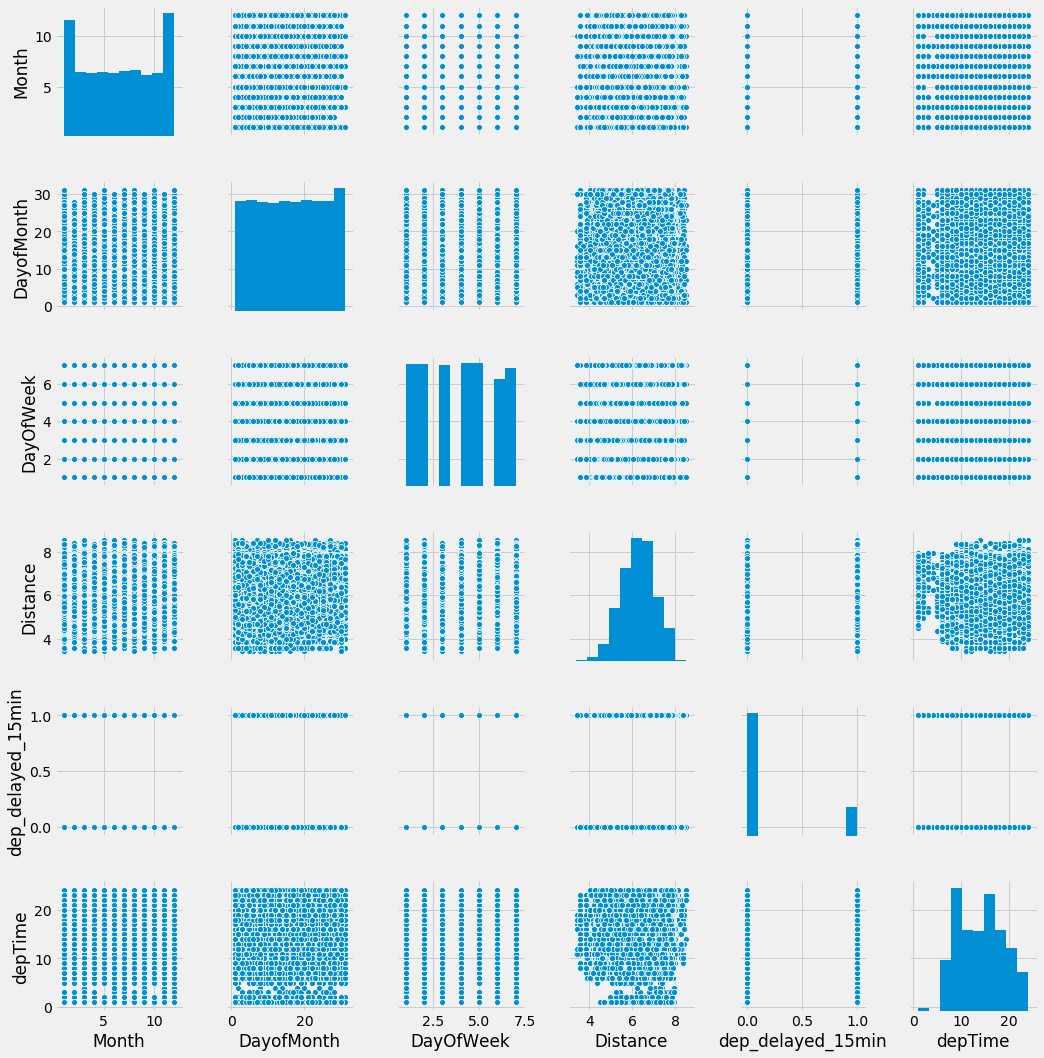

In [80]:
plt.figure(figsize=(12, 10))
sns.pairplot(data)

### seen in pairplot there is no dependence between features 

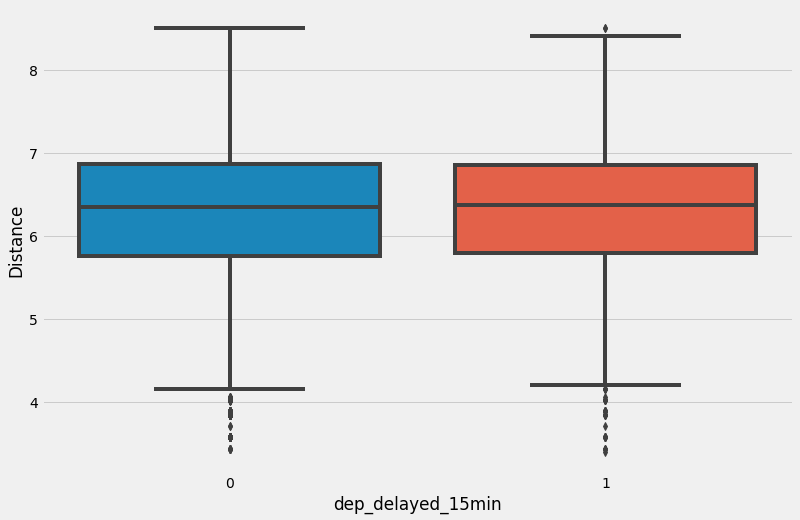

In [81]:
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'dep_delayed_15min', y='Distance', data=data)

### here you can see that late flights usually occur after lunch

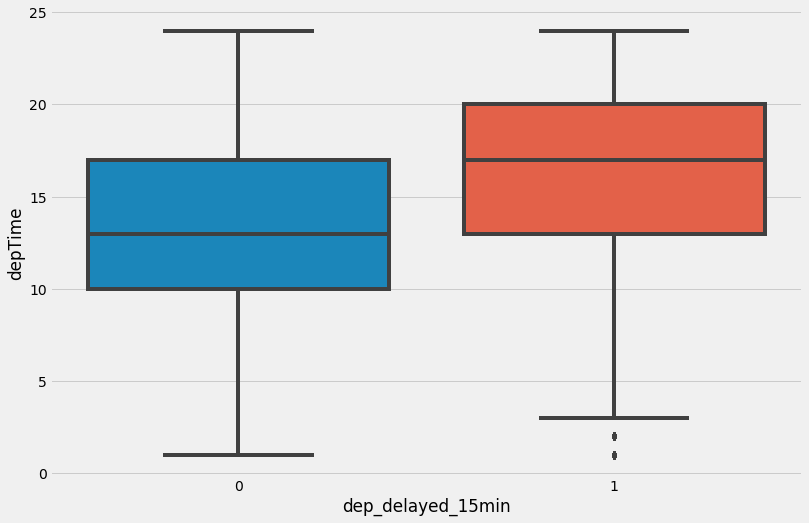

In [82]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="dep_delayed_15min", y="depTime", data=data)

### no noticeable deviation

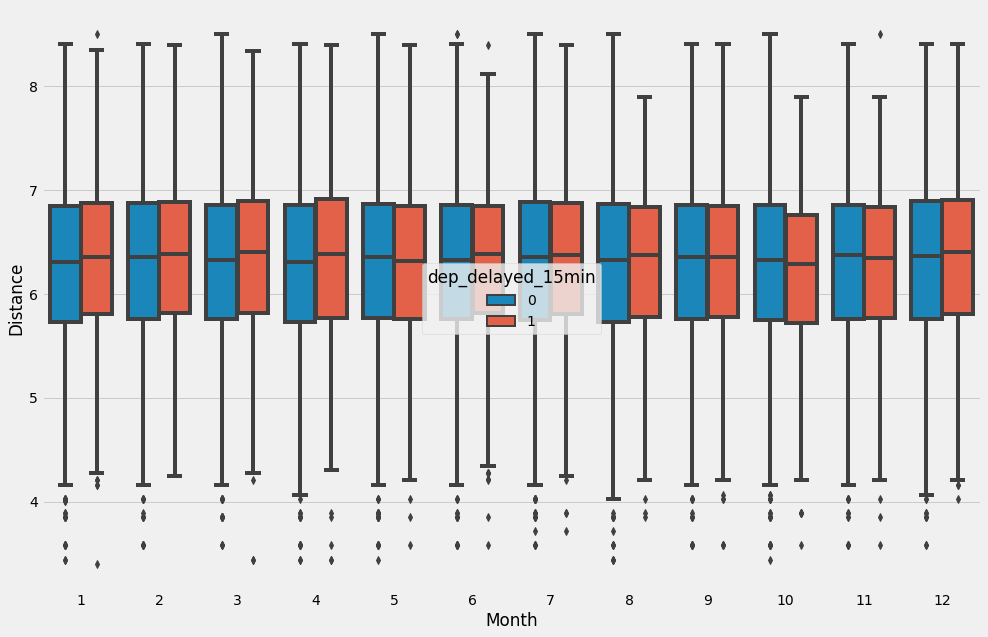

In [83]:
plt.figure(figsize=(15, 10))
sns.boxplot(x="Month", y="Distance", data=data, hue='dep_delayed_15min')

<Figure size 864x576 with 0 Axes>

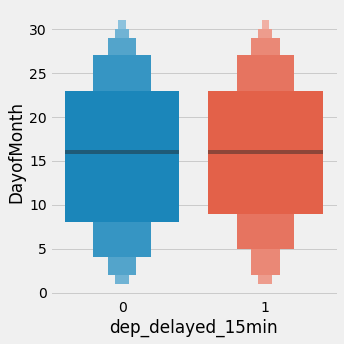

In [84]:
plt.figure(figsize=(12, 8))
sns.catplot(x='dep_delayed_15min', y='DayofMonth',kind="boxen", data=data)

### no dependence between features. Сorrelation proves this. All correlations are closer to zero

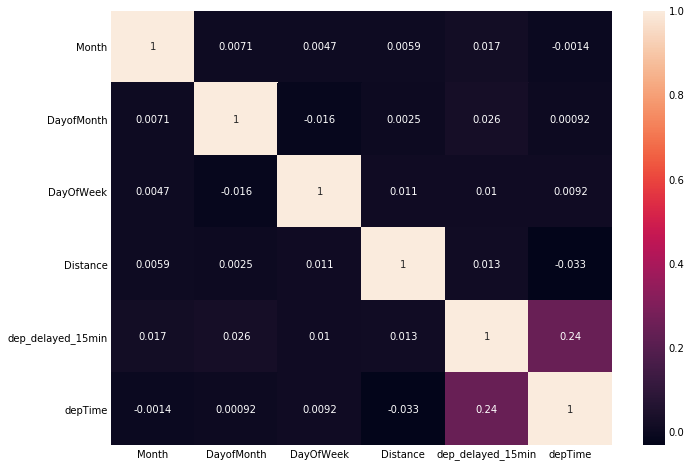

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True)